# 🔷 Overview

Hierarchical Clustering is a popular **unsupervised machine learning algorithm** used for **clustering tasks**. Unlike K-Means, it does not require specifying the number of clusters in advance. Instead, it builds a hierarchy of clusters by either merging or splitting them iteratively.

Hierarchical Clustering is widely used in **gene expression analysis, social network analysis, document classification, and customer segmentation**.

---

## 🔺 What is Hierarchical Clustering?

Hierarchical Clustering **creates a tree-like structure (dendrogram)** that represents nested clusters at different levels. There are two main types:

1. **Agglomerative (Bottom-Up)** – Each data point starts as its own cluster and merges iteratively.
2. **Divisive (Top-Down)** – The entire dataset starts as one cluster and splits recursively.

### Steps in Agglomerative Hierarchical Clustering:
1. **Initialize**: Treat each data point as an individual cluster.
2. **Compute Distance**: Measure the distance between all clusters.
3. **Merge Clusters**: Combine the closest clusters based on a linkage criterion.
4. **Repeat**: Continue until only one cluster remains or a stopping criterion is met.

Hierarchical Clustering is useful for detecting **nested structures** but struggles with **large datasets due to high computational cost**.

---

## 🔥 Popular Linkage Methods:

- **Single Linkage** 🧩 – Merges clusters based on the closest points (minimum distance).
- **Complete Linkage** 🔗 – Uses the farthest points (maximum distance) for merging.
- **Average Linkage** 📏 – Considers the average distance between all points in clusters.
- **Ward’s Method** 📊 – Minimizes intra-cluster variance, producing compact clusters.

---

## 📌 Applications of Hierarchical Clustering:

- **📌 Customer Segmentation** – Identifying consumer groups for targeted marketing.
- **📌 Gene Expression Analysis** – Clustering genes with similar expression patterns.
- **📌 Document Classification** – Grouping similar articles or texts.
- **📌 Social Network Analysis** – Identifying communities in network structures.

---

## ⚠️ Key Considerations:

✅ **No Need for K** – The number of clusters does not need to be specified beforehand.  
✅ **Dendrogram Interpretability** – Provides a visual representation of clustering hierarchy.  
❌ **Computational Cost** – Becomes inefficient for large datasets.  
❌ **Sensitive to Noise** – Outliers can impact clustering results significantly.  

---

# 🔷 The Hierarchical Clustering Formula:

A **Hierarchical Clustering** model partitions data by **building a hierarchy of nested clusters**. Unlike K-Means, it does **not require** specifying the number of clusters in advance and instead visualizes relationships in a **dendrogram**.

---

# 🔷 Mathematically, it minimizes:

$$
d(A, B) = \min_{a \in A, b \in B} || a - b ||
$$

For **single linkage**, the distance between clusters $ A $ and $ B $ is the **minimum** Euclidean distance between points in each cluster.

Other linkage methods include:

- **Complete Linkage**:
  $$
  d(A, B) = \max_{a \in A, b \in B} || a - b ||
  $$

- **Average Linkage**:
  $$
  d(A, B) = \frac{1}{|A| |B|} \sum_{a \in A} \sum_{b \in B} || a - b ||
  $$

- **Centroid Linkage**:
  $$
  d(A, B) = || \mu_A - \mu_B ||
  $$

- **Ward’s Method (Variance Minimization)**:
  $$
  d(A, B) = \sum_{i \in A \cup B} (x_i - \mu_{AB})^2
  $$

---

## 📌 Where:

- $ A, B $ → Clusters being merged  
- $ x_i $ → A data point in the cluster  
- $ \mu_A, \mu_B $ → Centroids (means) of clusters $ A $ and $ B $  
- $ \mu_{AB} $ → Mean of merged clusters $ A $ and $ B $  
- $ || a - b || $ → Euclidean distance between points  
- $ |A|, |B| $ → Number of points in clusters $ A $ and $ B $  

---

---

## 🔥 The Hierarchical Clustering Algorithm:

1. **Initialize:** Assign each data point to its own cluster.
2. **Compute Distance:** Measure pairwise distances between all clusters.
3. **Merge Clusters:** Select the closest clusters and combine them.
4. **Update Distance Matrix:** Recompute distances after merging.
5. **Repeat:** Continue merging until all points belong to a single cluster or a stopping criterion is met.

---

## 🎯 The Dendrogram:

A **dendrogram** is a tree-like structure that shows **how clusters are merged** at different distance levels.

- Cutting the dendrogram at a specific height determines the final **number of clusters**.
- Helps visualize relationships **without predefining K**.

---

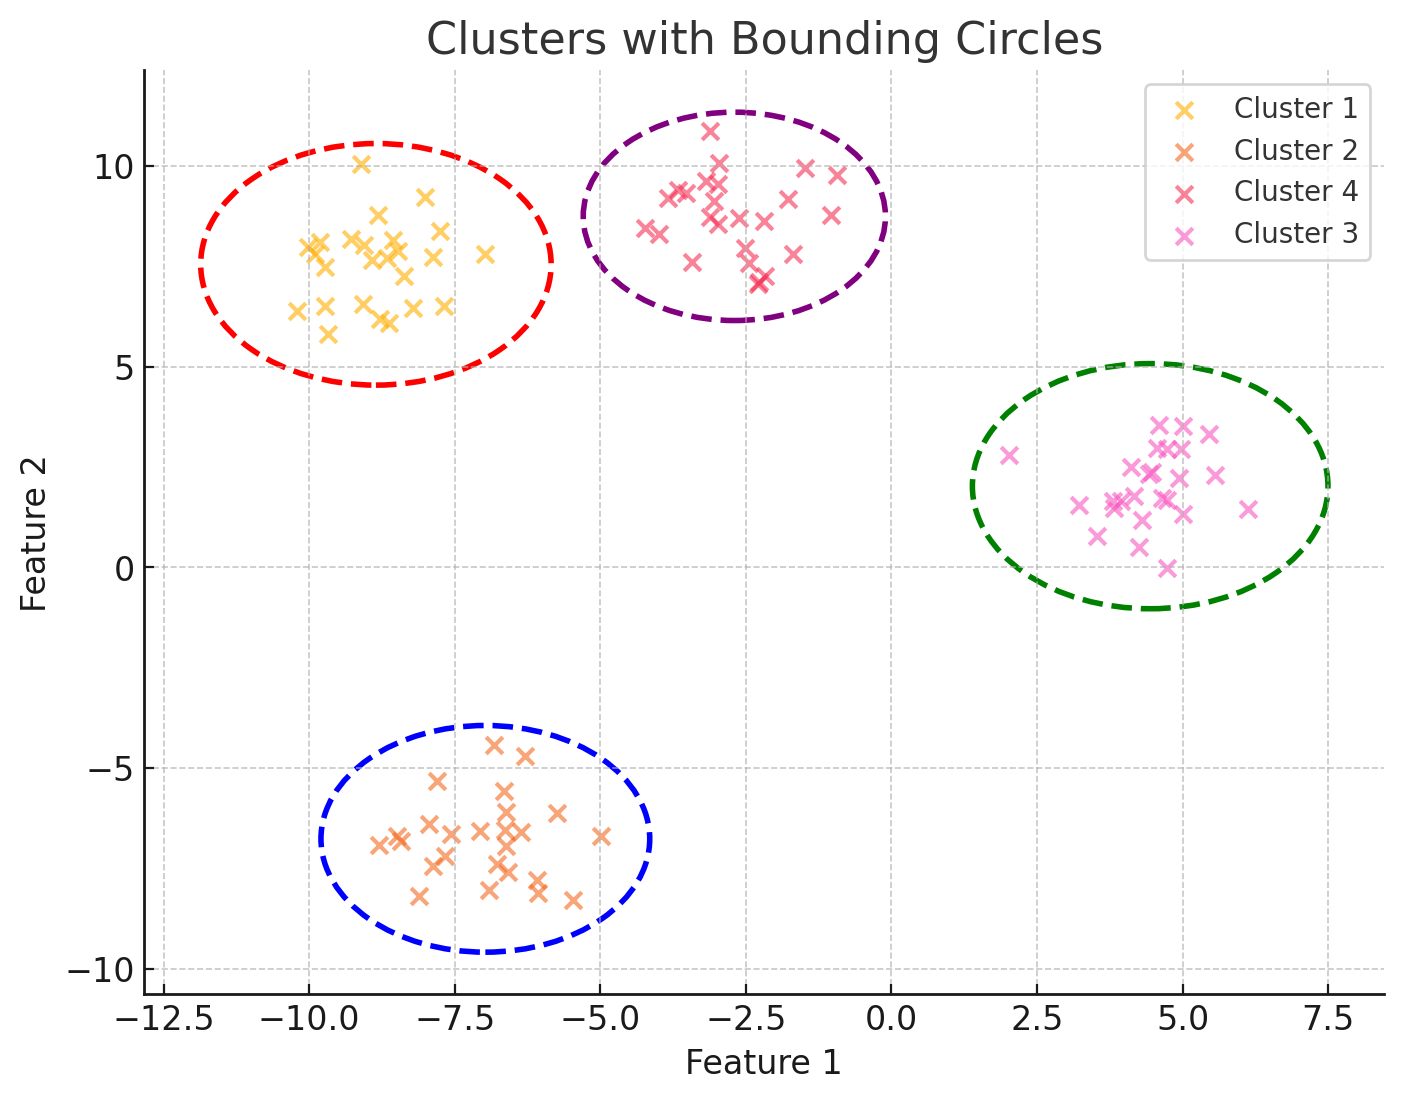

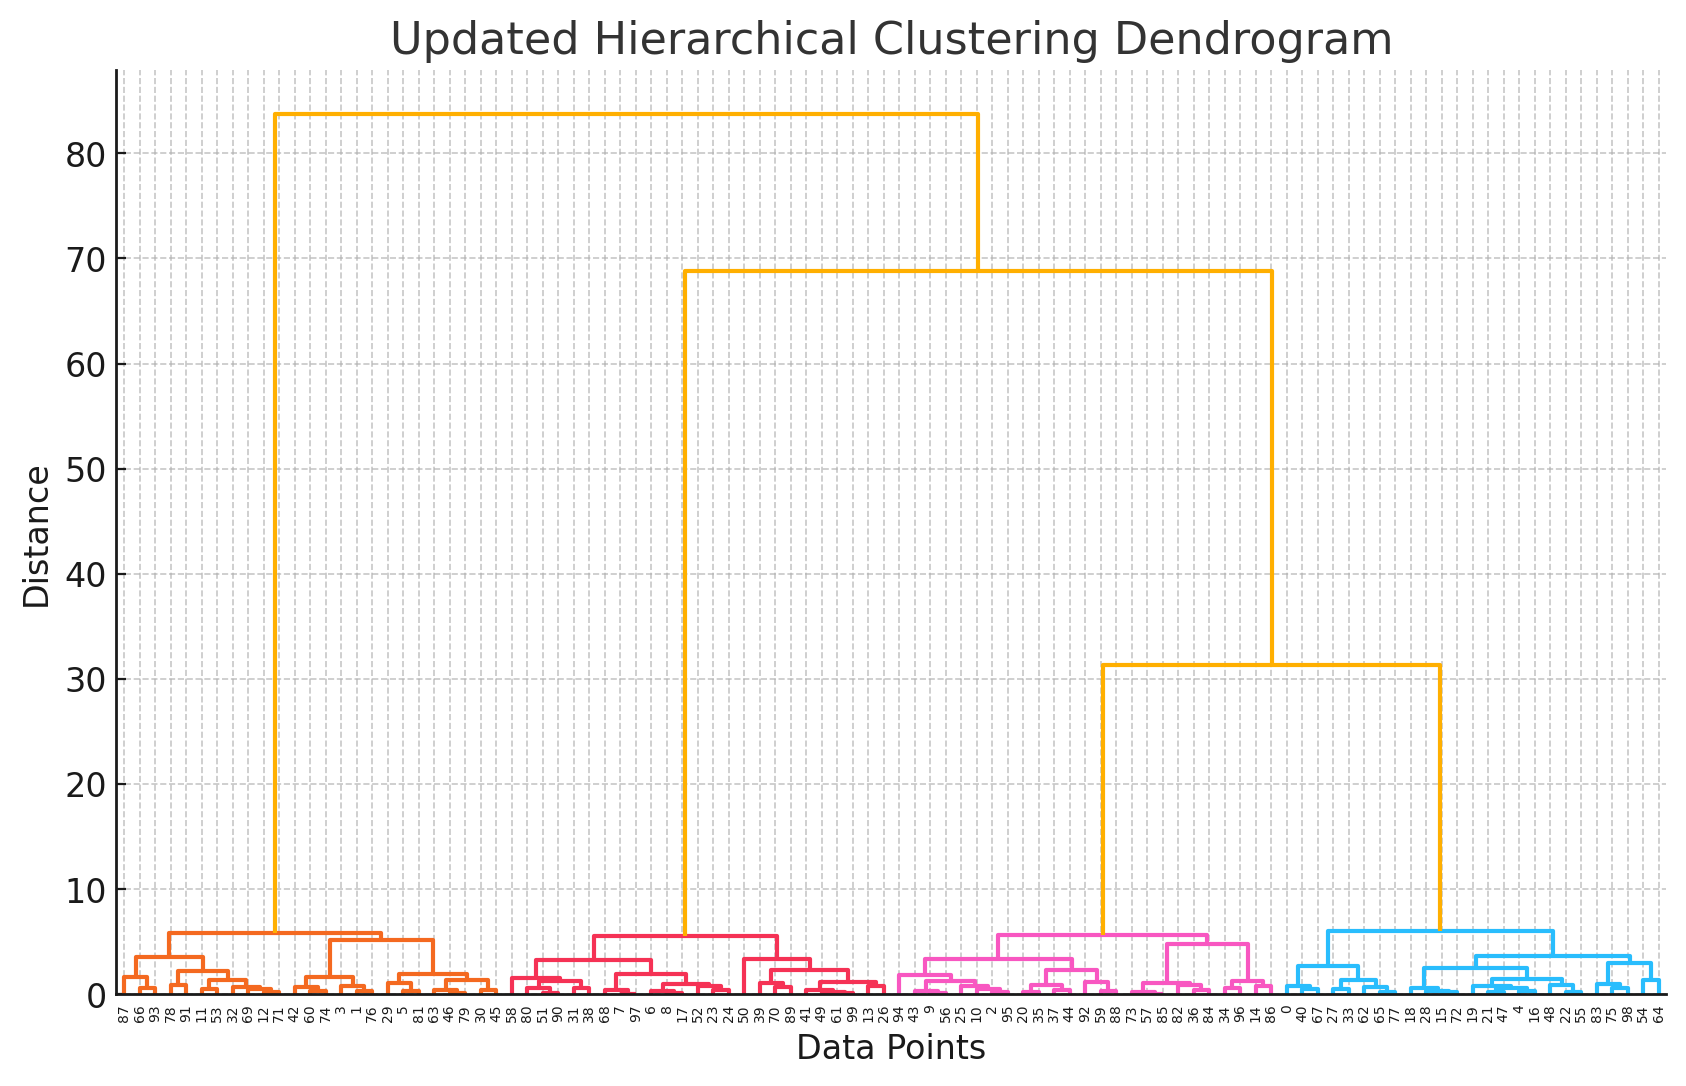

# 📊📊📊

In [ ]:
import numpy as np  # 📊 Import numerical computations
import pandas as pd  # 📂 Import data handling library
import matplotlib.pyplot as plt  # 📈 Import visualization library
import seaborn as sns  # 🎨 Import enhanced plotting library
import scipy.cluster.hierarchy as sch  # 🏗️ Import hierarchical clustering tools
from sklearn.cluster import AgglomerativeClustering, Birch, SpectralClustering  # 🏷️ Import clustering models
import hdbscan  # 🔍 Import hierarchical density-based clustering
from sklearn.model_selection import KFold  # 🔀 Import cross-validation method
from sklearn.metrics import silhouette_score, davies_bouldin_score  # 📊 Import model evaluation metrics
from sklearn.preprocessing import StandardScaler  # ⚖️ Import data normalization tool
import warnings
warnings.filterwarnings("ignore")

# 📥 Load Dataset

In [ ]:
# 📥 Load Dataset
# Read CSV file 📂 containing customer data
# Load dataset into pandas DataFrame 📑
df = pd.read_csv("Mall_Customers.csv")

# 🔍 Data Preprocessing

In [ ]:
# 🔍 Data Preprocessing
# Select relevant features 🎯 for clustering (Annual Income, Spending Score)
X = df.iloc[:, [3, 4]].values  # Extract selected columns 📊


# ⚖️ Standardize Features

In [ ]:
# ⚖️ Standardize Features
# Normalize dataset 🚀 to improve clustering performance
scaler = StandardScaler()  # Initialize standard scaler ⚖️
X_scaled = scaler.fit_transform(X)  # Apply standardization on dataset 📊

# 🏗️ Hierarchical Clustering - Dendrogram

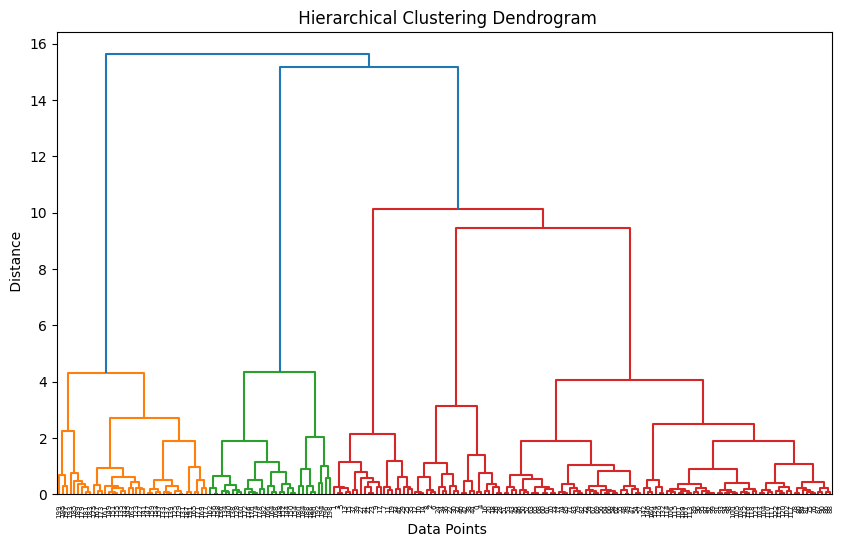

In [ ]:
# 🏗️ Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 6))  # Set figure size 🎨
linked = sch.linkage(X_scaled, method='ward')  # Compute linkage matrix 🔗
sch.dendrogram(linked)  # Plot dendrogram 📊
plt.title(" Hierarchical Clustering Dendrogram")  # Set plot title 🏷️
plt.xlabel(" Data Points")  # Label x-axis 📏
plt.ylabel(" Distance")  # Label y-axis 📏
plt.show()  # Display dendrogram 📊

# 🔧 Hyperparameter Tuning using Grid Search for Agglomerative Clustering

In [ ]:
# 🔧 Hyperparameter Tuning using Grid Search for Agglomerative Clustering
param_grid = {  # Define hyperparameter grid 🔢
    'n_clusters': list(range(2, 10)),  # Set range of cluster numbers 🔢
    'linkage': ['ward', 'complete', 'average', 'single']  # Test different linkage types 🔗
}

best_score = -1  # Initialize best score tracker 🎯
best_params = {}  # Initialize best parameter dictionary 📊

# Loop through parameter grid 🔄
for n_clusters in param_grid['n_clusters']:  # Iterate through cluster numbers 🔢
    for linkage in param_grid['linkage']:  # Iterate through linkage types 🔗
        try:
            hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  # Initialize model 🏷️
            labels = hc.fit_predict(X_scaled)  # Fit model and predict clusters 📊
            score = silhouette_score(X_scaled, labels)  # Evaluate model using Silhouette Score 📏
            if score > best_score:  # Compare scores 🔎
                best_score = score  # Update best score 🎯
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}  # Save best parameters 📊
        except:
            continue  # Skip invalid parameter combinations ❌

print(f"🏆 Best Agglomerative Parameters: {best_params}")  # Display best parameters 🏆
print(f"📈 Best Silhouette Score: {best_score:.4f}")  # Display best Silhouette Score 📊

🏆 Best Agglomerative Parameters: {'n_clusters': 5, 'linkage': 'ward'}
📈 Best Silhouette Score: 0.5538


# 🏆🏆🏆Train best Agglomerative Model

In [ ]:
# Train best Agglomerative Model
hc_best = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])  # Initialize best model 🏆
labels_hc = hc_best.fit_predict(X_scaled)  # Fit best model 📊

# 🏆Train Birch Model

In [ ]:
# Train Birch Model
birch_model = Birch(n_clusters=best_params['n_clusters'])  # Initialize Birch clustering model 🌲
labels_birch = birch_model.fit_predict(X_scaled)  # Fit Birch model 📊

# 🏆Train HDBSCAN *Model*

In [ ]:
# Train HDBSCAN Model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)  # Initialize HDBSCAN model 🔍
labels_hdbscan = hdbscan_model.fit_predict(X_scaled)  # Fit HDBSCAN model 📊

#🏆🏆🏆 Train Spectral Clustering Model

In [ ]:
# Train Spectral Clustering Model
spectral_model = SpectralClustering(n_clusters=best_params['n_clusters'], affinity='nearest_neighbors', assign_labels='kmeans')  # Initialize Spectral Clustering Model 🎭
labels_spectral = spectral_model.fit_predict(X_scaled)  # Fit Spectral model 📊

# 📊 Performance Metrics Comparison

In [30]:
# 📊 Performance Metrics Comparison
models = {
    "Agglomerative": labels_hc,
    "BIRCH": labels_birch,
    "HDBSCAN": labels_hdbscan,
    "Spectral": labels_spectral
}

performance_metrics = {}
for model_name, labels in models.items():
    silhouette = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
    davies_bouldin = davies_bouldin_score(X_scaled, labels) if len(set(labels)) > 1 else -1
    performance_metrics[model_name] = [silhouette, davies_bouldin]

    # 📊 Print Performance Table
performance_df = pd.DataFrame(performance_metrics, index=["Silhouette Score", "Davies-Bouldin Score"])
print(performance_df)


                      Agglomerative     BIRCH   HDBSCAN  Spectral
Silhouette Score           0.553809  0.414450  0.381582  0.544727
Davies-Bouldin Score       0.577862  0.697938  2.162170  0.586016


# 🎨 Improved Visualizations

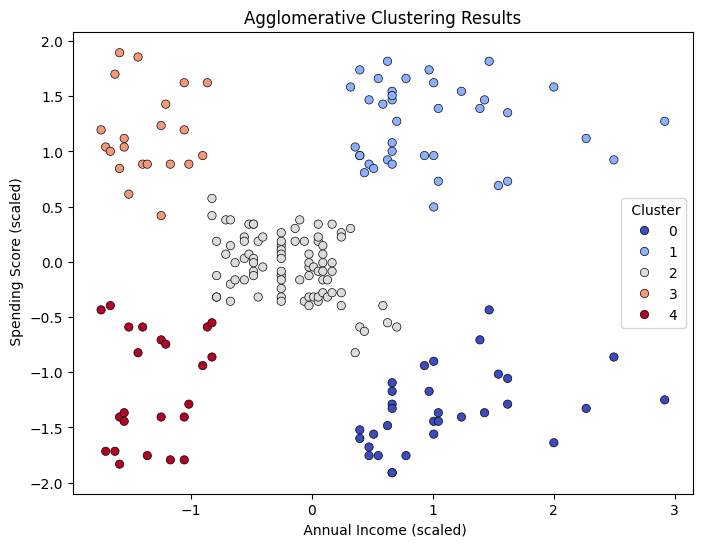

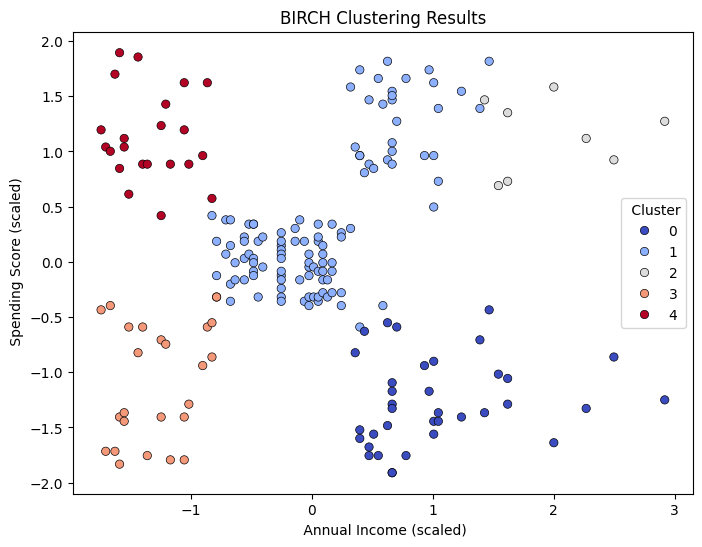

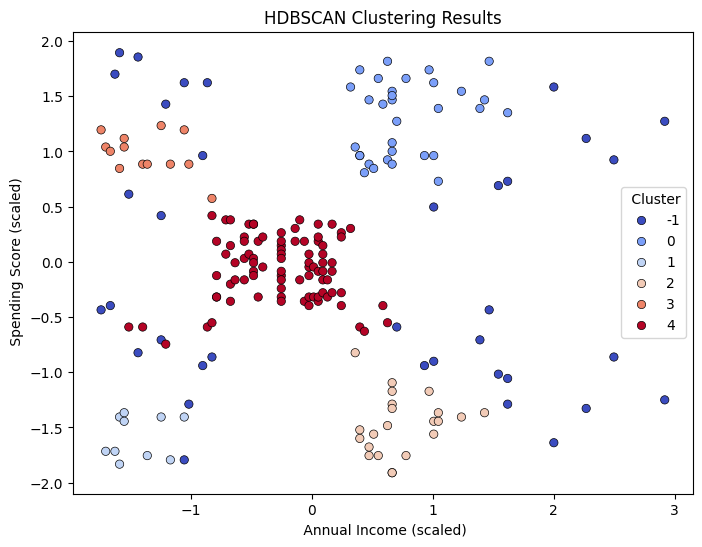

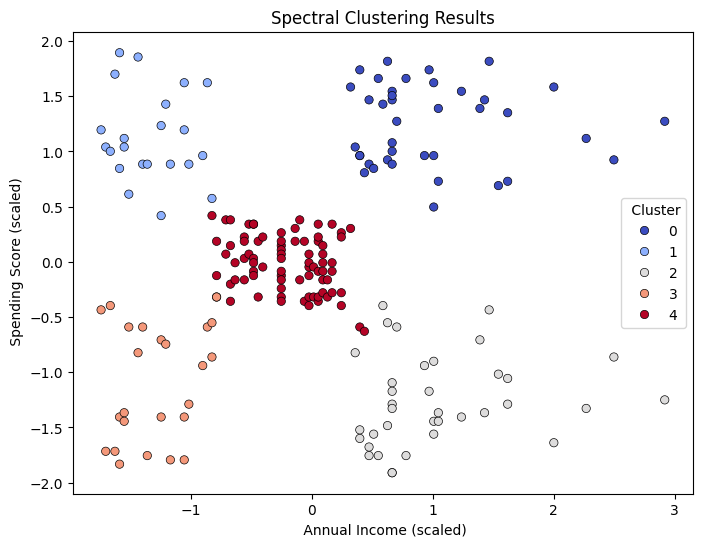

In [ ]:
# 🎨 Improved Visualizations
for model_name, labels in models.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='coolwarm', edgecolor='k')
    plt.title(f"{model_name} Clustering Results")
    plt.xlabel(" Annual Income (scaled)")
    plt.ylabel(" Spending Score (scaled)")
    plt.legend(title=" Cluster")
    plt.show()


# 🔀 Cross-Validation for all models

In [31]:
# 🔀 Cross-Validation for all models
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {"Agglomerative": [], "BIRCH": [], "HDBSCAN": [], "Spectral": []}

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    for model_name in cv_scores.keys():
        if model_name == "HDBSCAN":
            model = hdbscan.HDBSCAN(min_cluster_size=5)
        elif model_name == "BIRCH":
            model = Birch(n_clusters=best_params['n_clusters'])
        else:
            model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
        labels_cv = model.fit_predict(X_train)
        score = silhouette_score(X_train, labels_cv) if len(set(labels_cv)) > 1 else -1
        cv_scores[model_name].append(score)

# 📊 Print Cross-Validation Scores
cv_scores_df = pd.DataFrame(cv_scores)
print(cv_scores_df.mean())


Agglomerative    0.545542
BIRCH            0.466124
HDBSCAN          0.375145
Spectral         0.545542
dtype: float64
